## Dataset presentation

The Household Power Consumption dataset is a multivariate time series dataset that describes the electricity consumption for a single household over four years. 

Source : http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

The data was collected between December 2006 and November 2010 and observations of power consumption within the household were collected every minute.

It is a multivariate series comprised of seven variables:
 - global_active_power: The total active power consumed by the household (kilowatts).
 - global_reactive_power: The total reactive power consumed by the household (kilowatts).
 - voltage: Average voltage (volts).
 - global_intensity: Average current intensity (amps).
 - sub_metering_1: Active energy for kitchen (watt-hours of active energy).
 - sub_metering_2: Active energy for laundry (watt-hours of active energy).
 - sub_metering_3: Active energy for climate control systems (watt-hours of active energy).
 
We're only interested in global active power variable, as we will be working on a univariate times series forecating problem.

## Loading data and filling missing values

In [1]:
import pandas as pd
from numpy import nan
from numpy import isnan
from pandas import read_csv
import matplotlib.pyplot as plt

In [2]:
# load and clean-up data
dataset = read_csv('household_power_consumption.txt', sep=';', na_values=['nan','?'] , 
                   low_memory=False, infer_datetime_format=True,  parse_dates={'datetime' : ['Date', 'Time']}, 
                   index_col=['datetime'])


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [4]:
dataset.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [5]:
# fill missing values with a value at the same time one day ago
def fill_missing(values):
    one_day = 60 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if isnan(values[row, col]):
                values[row, col] = values[row - one_day, col]
                
fill_missing(dataset.values)
values = dataset.values

In [6]:
dataset.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [7]:
#keep global active power and drop the rest of the variables
dataset=dataset.drop(columns=['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3'])

In [8]:
dataset['year'] = dataset.index.year
dataset['month'] = dataset.index.month

print(dataset.shape)
dataset.head()

(2075259, 3)


,Global_active_power,year,month
datetime,,,
2006-12-16 17:24:00,4.216,2006,12
2006-12-16 17:25:00,5.360,2006,12
2006-12-16 17:26:00,5.374,2006,12
2006-12-16 17:27:00,5.388,2006,12
2006-12-16 17:28:00,3.666,2006,12


## Visualization

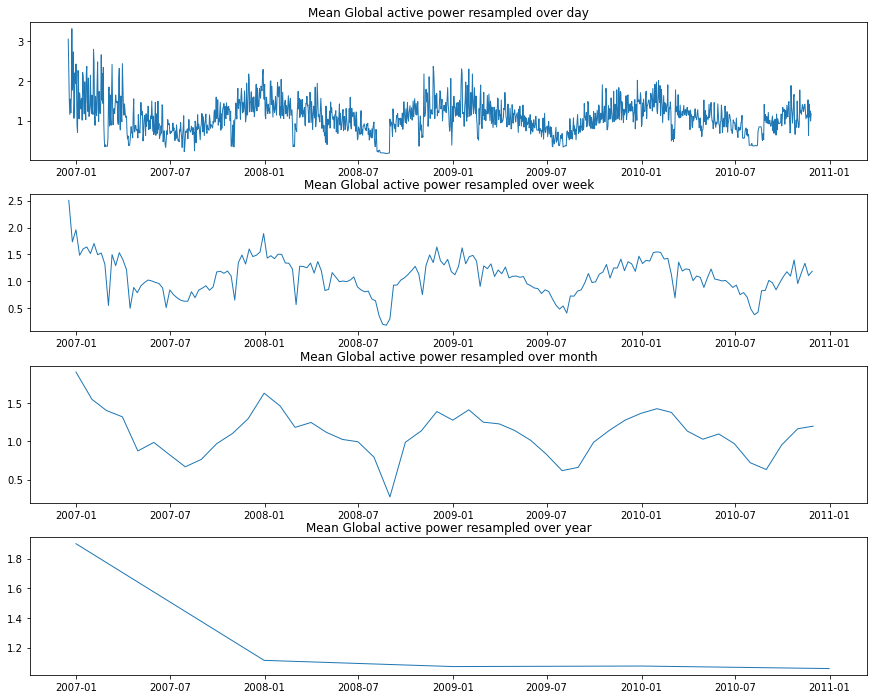

In [9]:
#Average Global Active Power Resampled Over Day, Week, Month and Year
fig = plt.figure(figsize=(15,12))
fig.subplots_adjust(hspace=.25)
ax1 = fig.add_subplot(4,1,1)
ax1.plot(dataset['Global_active_power'].resample('D').mean(),linewidth=1)
ax1.set_title('Mean Global active power resampled over day')
ax1.tick_params(axis='both', which='major')

ax2 = fig.add_subplot(4,1,2, sharex=ax1)
ax2.plot(dataset['Global_active_power'].resample('W').mean(),linewidth=1)
ax2.set_title('Mean Global active power resampled over week')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(4,1,3, sharex=ax1)
ax3.plot(dataset['Global_active_power'].resample('M').mean(),linewidth=1)
ax3.set_title('Mean Global active power resampled over month')
ax3.tick_params(axis='both', which='major')

ax4  = fig.add_subplot(4,1,4, sharex=ax1)
ax4.plot(dataset['Global_active_power'].resample('A').mean(),linewidth=1)
ax4.set_title('Mean Global active power resampled over year')
ax4.tick_params(axis='both', which='major');

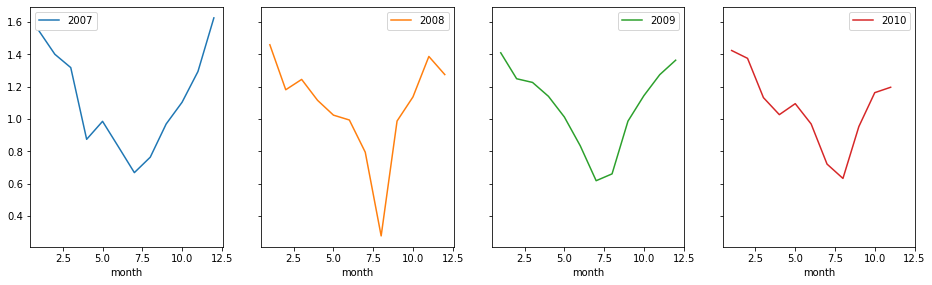

In [10]:
#Global Active Power by Years
pd.pivot_table(dataset.loc[dataset['year'] != 2006], values = "Global_active_power", 
               columns = "year", index = "month").plot(subplots = True, figsize=(20, 15), layout=(3, 5), sharey=True);

In [11]:
dataset=dataset.drop(columns=['year','month'])
dataset=dataset['Global_active_power'].resample('D').sum()
dataset.to_csv('household_power_consumption_days.csv')